Tratamento do Dataset

In [1]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

C:\Users\elisa\AppData\Local\Temp\ipykernel_12432\3978777534.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
unique_counts = data.nunique()
unique_counts # valores unicos para cada coluna
# data.head()
# data.tail()
#data.shape #(3207, 12)
data.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [16]:
data['transmission'].unique()

array(['5-Speed A/T', 'A/T', 'CVT Transmission', '6-Speed A/T',
       '4-Speed A/T', 'Automatic', '5-Speed M/T',
       'Transmission w/Dual Shift Mode', '7-Speed A/T', '1-Speed A/T',
       '1-Speed Automatic', '6-Speed M/T', '10-Speed Automatic',
       '8-Speed A/T', '8-Speed Automatic', '6-Speed Automatic',
       '10-Speed A/T', '9-Speed A/T', 'Automatic CVT',
       '9-Speed Automatic', 'M/T', '7-Speed M/T', 'Variable',
       '6-Speed Automatic with Auto-Shift',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic', '2',
       '7-Speed DCT Automatic', '6-Speed Manual', '5-Speed Automatic',
       '–', 'Automatic, 8-Spd', '8-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       'Transmission Overdrive Switch', 'SCHEDULED FOR OR IN PRODUCTION',
       'Single-Speed Fixed Gear',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes',
       '7-Speed Automatic', 'Automatic, 9-Spd 9G-Tronic',
       'Autom

In [9]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Tipo_Combustivel
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000,285.0,3.6,6,Gasoline Fuel
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,270.0,3.5,6,Gasoline Fuel
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,208.0,2.5,4,Electric
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000,260.0,2.4,4,Gasoline Fuel
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,301.0,4.6,8,Gasoline Fuel


In [3]:
data.info() #milage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [5]:
data.describe()

,model_year,price
count,3207.000000,3.207000e+03
mean,2015.517930,4.487024e+04
std,6.131963,8.382969e+04
min,1974.000000,2.000000e+03
25%,2012.000000,1.705000e+04
50%,2017.000000,3.169800e+04
75%,2020.000000,4.999650e+04
max,2024.000000,2.954083e+06


In [2]:
#modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

1974 2024


#### milage -> INT

In [3]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [23]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

#### data INFO

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   int64 
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 300.8+ KB


#### NULL's

In [4]:
data.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       147
engine            0
transmission      0
ext_col           0
int_col           0
accident         89
clean_title     467
price             0
dtype: int64

# utilizar algoritmo de arvore de decisão para preencher esses valores?

In [10]:
data['model_year'].value_counts()

model_year
2021    287
2022    283
2020    258
2018    253
2019    236
2016    218
2017    214
2023    179
2015    178
2014    143
2013    124
2012    108
2011    100
2008     83
2007     82
2010     79
2005     61
2009     57
2006     51
2004     49
2003     38
2002     28
2001     27
2000     14
1999     11
1998      9
1993      8
1996      7
1995      6
1997      6
1994      5
2024      3
1992      1
1974      1
Name: count, dtype: int64

#### counts

In [10]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os valores nulos só podem ser nan (ou não se sabe)??
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

transmission
A/T                                                                 841
8-Speed A/T                                                         325
Transmission w/Dual Shift Mode                                      321
6-Speed A/T                                                         283
6-Speed M/T                                                         195
Automatic                                                           190
7-Speed A/T                                                         165
8-Speed Automatic                                                   140
10-Speed A/T                                                        102
5-Speed A/T                                                          68
4-Speed A/T                                                          59
9-Speed A/T                                                          57
6-Speed Automatic                                                    54
1-Speed A/T                                        

In [13]:
len(data['brand'].unique())

56

In [108]:
data.describe()

,model_year,milage,price
count,3207.000000,3207.000000,3.207000e+03
mean,2015.517930,64594.983785,4.487024e+04
std,6.131963,52387.260707,8.382969e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23151.500000,1.705000e+04
50%,2017.000000,52253.000000,3.169800e+04
75%,2020.000000,93450.000000,4.999650e+04
max,2024.000000,405000.000000,2.954083e+06


#### BOXPLOT

model_year       Axes(0.125,0.11;0.227941x0.77)
milage        Axes(0.398529,0.11;0.227941x0.77)
price         Axes(0.672059,0.11;0.227941x0.77)
dtype: object

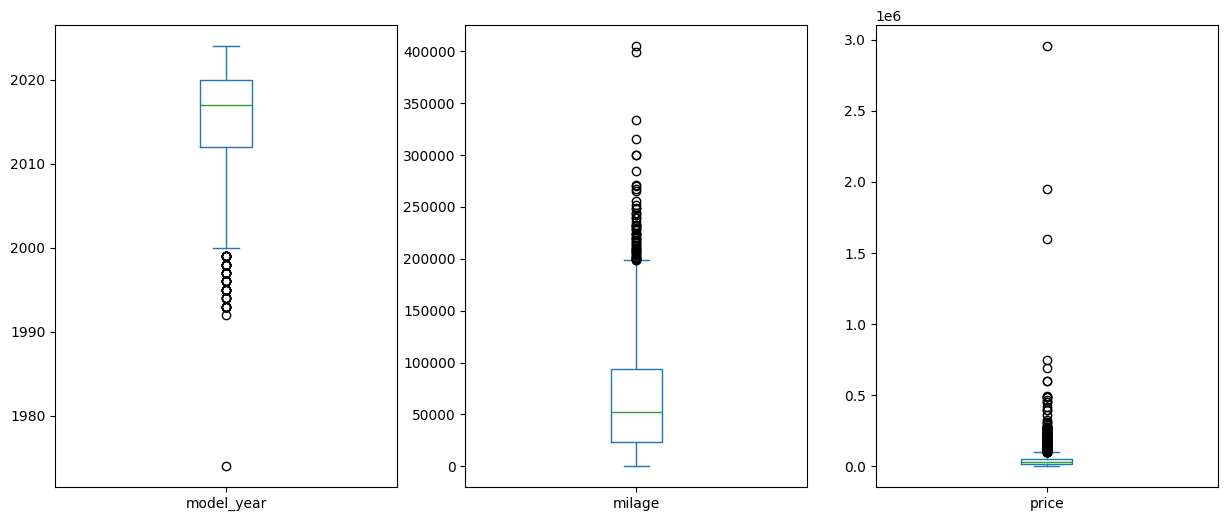

In [112]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [114]:
data[data['model_year']<1990] # outlier do 1º gráfico
data[data['milage']>350000] # outlier do 2º gráfico
data[data['price']>1500000] # 3º


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1650,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
2484,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
2564,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000


#### BARPLOT

In [5]:
media_por_cor = data.groupby('ext_col')['price'].mean().sort_values(ascending=False)
media_por_cor

ext_col
Tempest                                    599995.000000
Balloon White                              449991.000000
Bianco Isis                                399900.000000
Bianco Monocerus                           359991.000000
Granite                                    289991.000000
Arancio Borealis                           279991.000000
Matte White                                279000.000000
Onyx                                       272950.000000
Nero Noctis                                267950.000000
Grigio Nimbus                              259991.000000
Rosso Corsa                                243900.000000
Fountain Blue                              239991.000000
–                                          237006.000000
Rosso Mars Metallic                        232400.000000
Lizard Green                               229900.000000
Diamond White                              229000.000000
Nero Daytona                               215000.000000
Custom Color           

C:\Users\elisa\AppData\Local\Temp\ipykernel_20348\3998704344.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\elisa\AppData\Local\Temp\ipykernel_20348\3998704344.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\elisa\AppData\Local\Temp\ipykernel_20348\3998704344.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\elisa\AppData\Local\Temp\ipykernel_20348\3998704344.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\elisa\AppData\Local\Temp\ipykernel_20348\3998704344.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\e

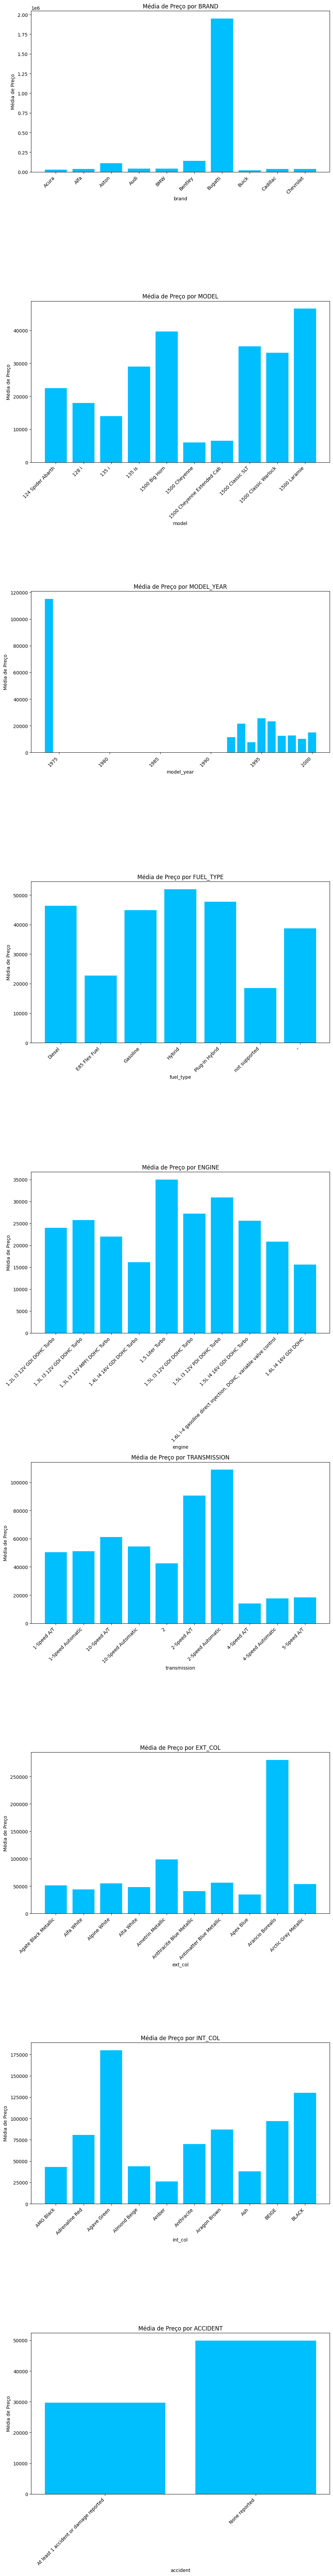

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'df' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)

# Lista para armazenar os gráficos gerados
colunas = ['brand',	'model', 'model_year',	'fuel_type',	'engine',	'transmission',	'ext_col',	'int_col',	'accident',	'clean_title']	
fig, axs = plt.subplots(len(colunas) - 1, 1, figsize=(10, 5 * (len(colunas) - 1)))

# Iterar sobre as colunas do DataFrame (exceto a última)
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.head(10)

    # Plotar o gráfico de barras para a média do preço por valor
    axs[i].bar(top.index, top.values, color='deepskyblue')

    axs[i].set_title(f'Média de Preço por {column.upper()}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Média de Preço')

    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.3, 1, 2])

plt.show()

#### SCATTER

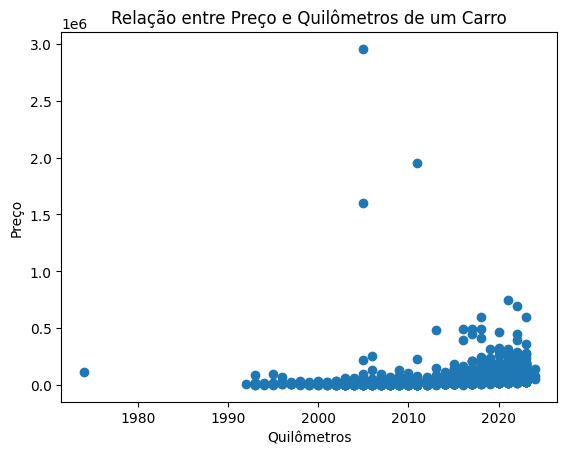

In [17]:
# Plotar um gráfico de dispersão
plt.scatter(data['model_year'], data['price'])

# Adicionar rótulos e título
plt.xlabel('Quilômetros')
plt.ylabel('Preço')
plt.title('Relação entre Preço e Quilômetros de um Carro')

# Exibir o gráfico
plt.show()

#### LINEPLOT

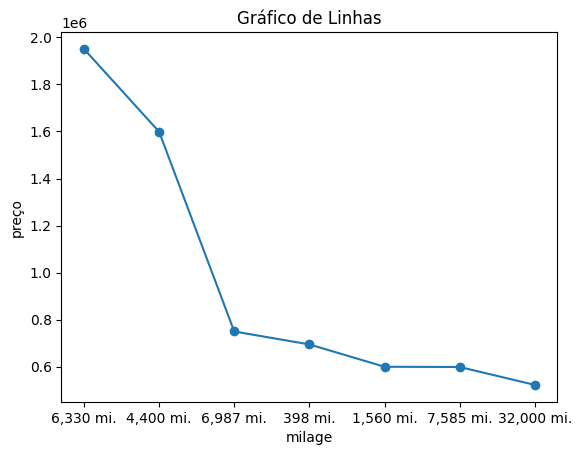

In [10]:
d = data.groupby('milage')['price'].mean().sort_values(ascending=False)
d = d.head(7)
plt.plot(d.index, d.values, marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('milage')
plt.ylabel('preço')
plt.title('Gráfico de Linhas')

# Exibir o gráfico
plt.show()

#### o preço diminui a medida que o mº de quilometros aumenta

In [11]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

                          count          mean            std        min  \
brand         model_year                                                  
Acura         1993          1.0  9.020000e+04            NaN    90200.0   
              1995          1.0  1.099900e+04            NaN    10999.0   
              1998          1.0  5.500000e+03            NaN     5500.0   
              2003          1.0  4.000000e+03            NaN     4000.0   
              2005          3.0  6.499667e+03    1509.503340     4900.0   
              2006          1.0  1.499000e+04            NaN    14990.0   
              2007          1.0  7.700000e+03            NaN     7700.0   
              2008          1.0  1.000000e+04            NaN    10000.0   
              2010          2.0  1.144400e+04    3456.337946     9000.0   
              2011          2.0  8.750000e+03    4596.194078     5500.0   
              2012          1.0  1.900000e+04            NaN    19000.0   
              2013       

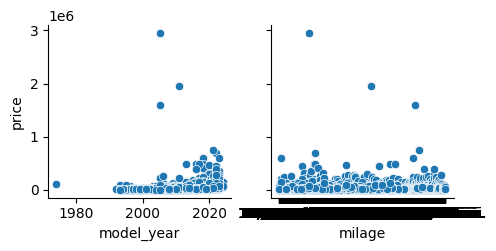

In [29]:
import seaborn as sns
sns.pairplot(data, x_vars=['model_year', 'milage'], y_vars='price', kind='scatter')
plt.show()

#### [ENGINE] novos atributos 

In [43]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'(\d+)V')

# data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')


In [46]:
data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3207 non-null   object 
 1   model             3207 non-null   object 
 2   model_year        3207 non-null   int64  
 3   milage            3207 non-null   object 
 4   fuel_type         3060 non-null   object 
 5   engine            3207 non-null   object 
 6   transmission      3207 non-null   object 
 7   ext_col           3207 non-null   object 
 8   int_col           3207 non-null   object 
 9   accident          3118 non-null   object 
 10  clean_title       2740 non-null   object 
 11  price             3207 non-null   int64  
 12  Potencia          2578 non-null   float64
 13  Capacidade_Motor  3020 non-null   float64
 14  Numero_Cilindros  2851 non-null   float64
 15  Numero_Valvulas   396 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory

In [53]:
data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

,engine,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
0,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,285.0,3.60,6.0,NaN
1,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,270.0,3.50,6.0,NaN
2,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,208.0,2.50,4.0,NaN
3,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,260.0,2.40,4.0,NaN
4,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,301.0,4.60,8.0,NaN
5,153.0HP 2.3L 4 Cylinder Engine Gasoline Fuel,153.0,2.30,4.0,NaN
6,240.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,240.0,3.50,6.0,NaN
7,5.0L V8 32V PDI DOHC,NaN,5.00,8.0,32.0
8,115.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,115.0,1.60,4.0,NaN
9,305.0HP 6.8L 10 Cylinder Engine Gasoline Fuel,305.0,6.80,10.0,NaN


In [50]:
d=data[data['Potencia'].isnull()]
d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head()

,engine,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
7,5.0L V8 32V PDI DOHC,NaN,5.0,8.0,32.0
11,3.0 Liter Turbo,NaN,3.0,NaN,NaN
17,4.0L V8 32V GDI DOHC Twin Turbo,NaN,4.0,8.0,32.0
19,3.5L V6 24V GDI SOHC,NaN,3.5,6.0,24.0
26,6.8L V12 48V GDI DOHC Twin Turbo,NaN,6.8,12.0,48.0


preencher NULLS com média ou assim ?

C:\Users\elisa\AppData\Local\Temp\ipykernel_4940\3267197256.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_4940\3267197256.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_4940\3267197256.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')


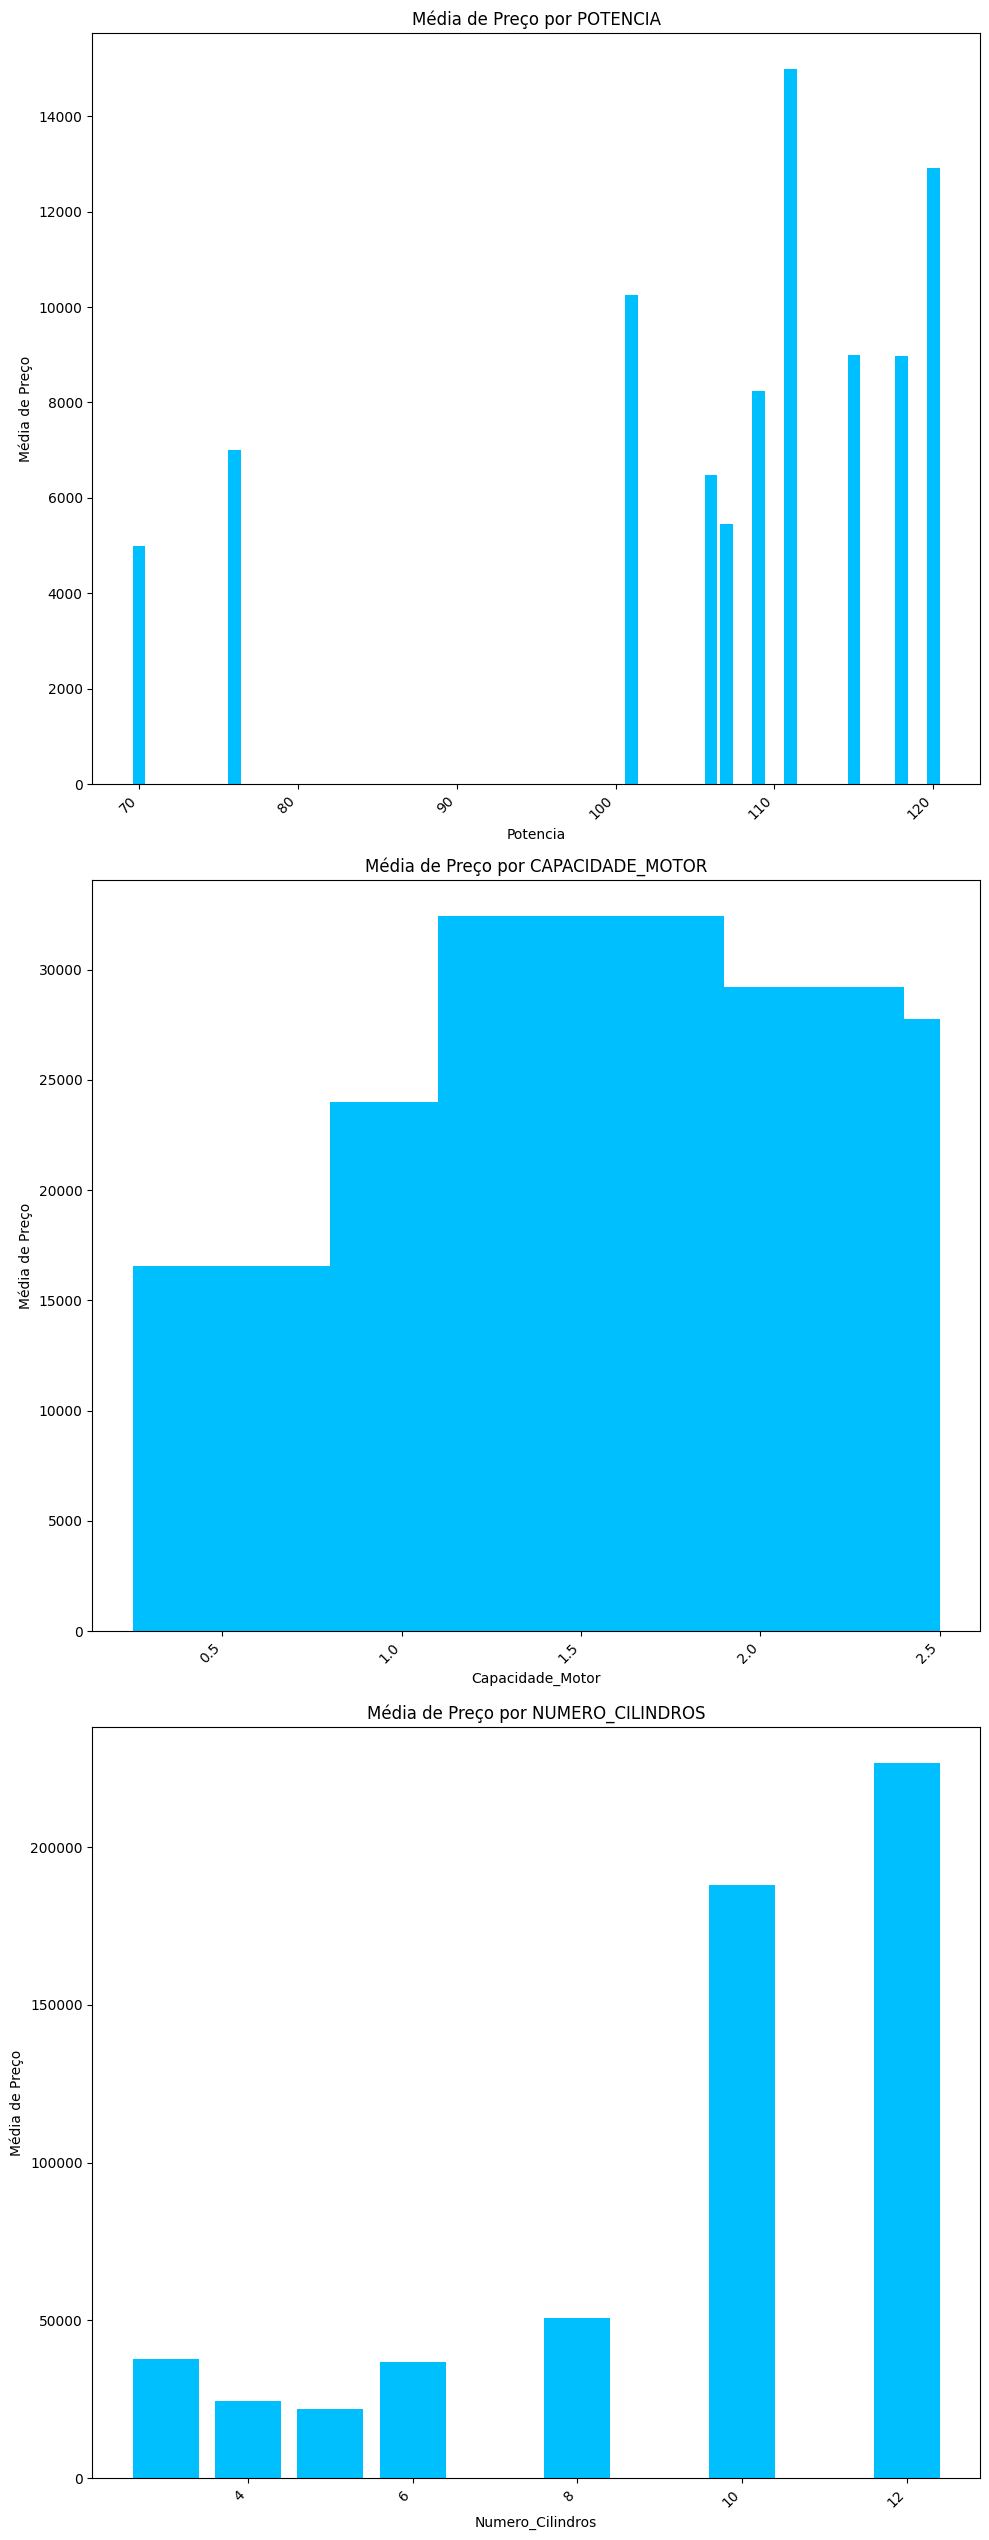

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'df' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)

# Lista para armazenar os gráficos gerados
colunas = ['Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas']	
fig, axs = plt.subplots(len(colunas) - 1, 1, figsize=(10, 5 * (len(colunas) - 1)))

# Iterar sobre as colunas do DataFrame (exceto a última)
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.head(10)

    # Plotar o gráfico de barras para a média do preço por valor
    axs[i].bar(top.index, top.values, color='deepskyblue')

    axs[i].set_title(f'Média de Preço por {column.upper()}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Média de Preço')

    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.3, 1, 2])

plt.show()

In [37]:
data['Numero_Valvulas'].unique()

array([ 6.,  4.,  8., 10., nan, 12.,  3.,  5.])

In [27]:
data['Numero_Cilindros'].unique()

array([ 6.,  4.,  8., 10., nan, 12.,  3.,  5.])

In [28]:
data['Capacidade_Motor'].unique()

array(['3.6', '3.5', '2.5', '2.4', '4.6', '2.3', '5.0', '1.6', '6.8',
       '3.0', '2.0', nan, '4.0', '5.4', '3.7', '3.3', '5.7', '5.2',
       '0.65', '6.7', '3.8', '5.3', '6.2', '4.4', '5.6', '6.0', '4.7',
       '1.2', '2.9', '2.7', '3.9', '4.2', '5.8', '3.2', '6.4', '1.8',
       '4.3', '1.5', '5.5', '6.3', '4.8', '6.75', '7.0', '1.4', '3.4',
       '6.5', '2.2', '2.1', '2', '8.3', '6.6', '7.3', '2.8', '6.1', '4',
       '8.1', '3', '4.5', '5.9', '7.4', '1.3', '1.0', '8.0', '6', '8.4',
       '5'], dtype=object)

In [52]:
sorted(data['Potencia'].unique())

[107.0,
 115.0,
 118.0,
 120.0,
 131.0,
 138.0,
 140.0,
 142.0,
 147.0,
 148.0,
 152.0,
 153.0,
 158.0,
 160.0,
 165.0,
 166.0,
 168.0,
 169.0,
 170.0,
 172.0,
 173.0,
 174.0,
 175.0,
 177.0,
 180.0,
 181.0,
 182.0,
 184.0,
 188.0,
 190.0,
 192.0,
 195.0,
 198.0,
 200.0,
 201.0,
 202.0,
 203.0,
 204.0,
 206.0,
 208.0,
 210.0,
 211.0,
 215.0,
 220.0,
 225.0,
 228.0,
 230.0,
 236.0,
 240.0,
 241.0,
 242.0,
 245.0,
 247.0,
 248.0,
 252.0,
 255.0,
 258.0,
 260.0,
 261.0,
 265.0,
 266.0,
 268.0,
 270.0,
 271.0,
 275.0,
 276.0,
 278.0,
 280.0,
 284.0,
 285.0,
 286.0,
 287.0,
 288.0,
 290.0,
 291.0,
 292.0,
 293.0,
 295.0,
 300.0,
 301.0,
 nan,
 70.0,
 76.0,
 101.0,
 106.0,
 109.0,
 111.0,
 121.0,
 122.0,
 126.0,
 130.0,
 132.0,
 134.0,
 136.0,
 139.0,
 141.0,
 143.0,
 146.0,
 150.0,
 154.0,
 155.0,
 156.0,
 159.0,
 161.0,
 162.0,
 164.0,
 167.0,
 171.0,
 178.0,
 179.0,
 185.0,
 186.0,
 187.0,
 189.0,
 191.0,
 197.0,
 199.0,
 205.0,
 207.0,
 212.0,
 214.0,
 217.0,
 219.0,
 221.0,
 224.0,
 226